In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from scipy import stats, integrate
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
accu_data = pd.read_csv("Accuracies.csv")

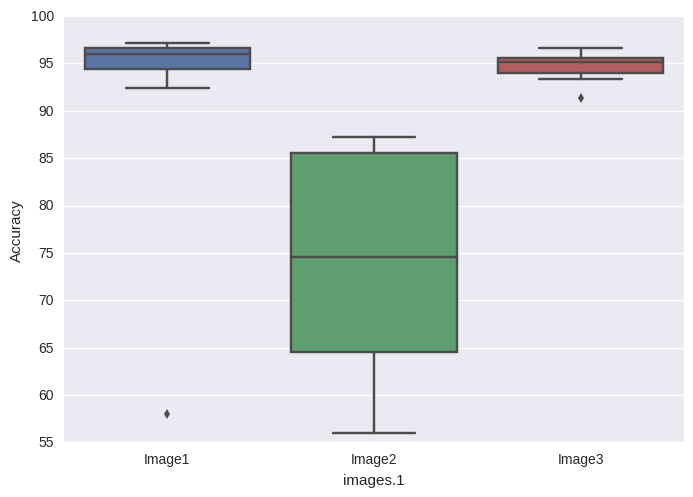

In [8]:
sns.boxplot(y = 'Accuracy', x = 'images.1', data = accu_data)

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

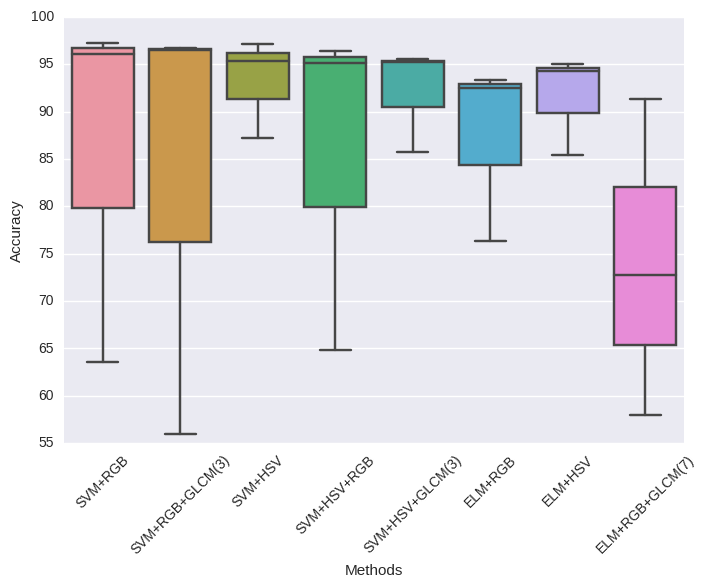

In [9]:
sns.boxplot(y = 'Accuracy', x = 'Methods', data = accu_data)
plt.xticks(rotation = 45)

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

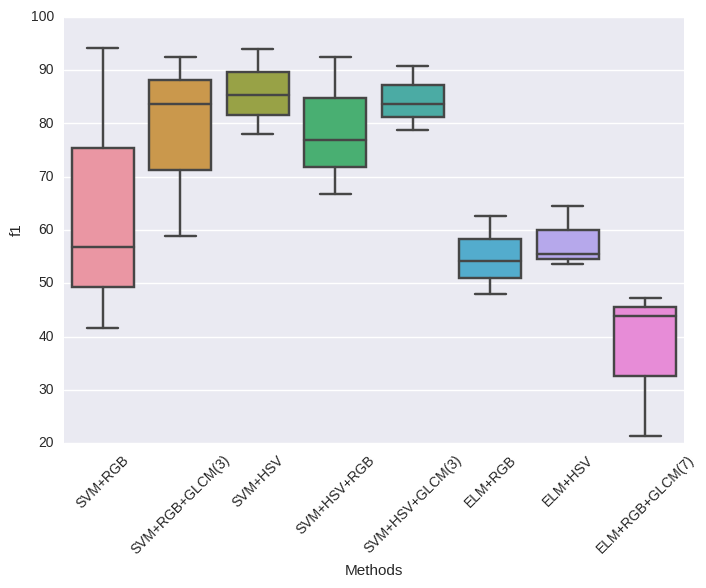

In [10]:
sns.boxplot(y = 'f1', x = 'Methods', data = accu_data)
plt.xticks(rotation = 45)

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

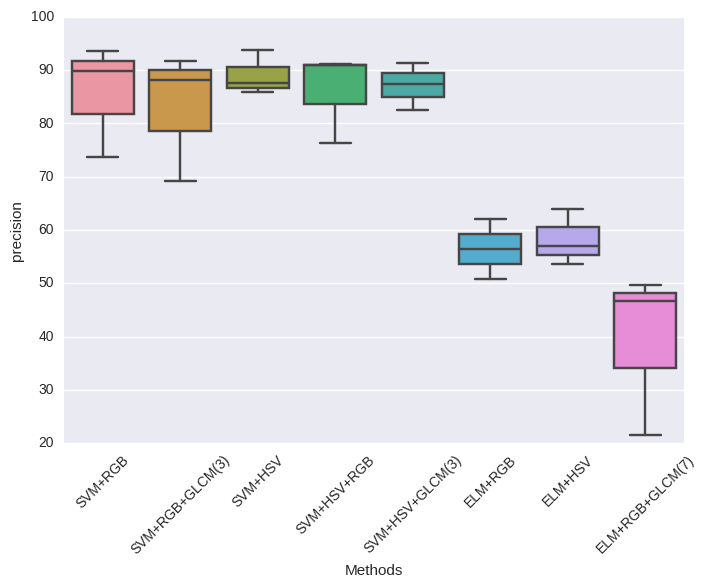

In [12]:
sns.boxplot(y = 'precision', x = 'Methods', data = accu_data)
plt.xticks(rotation = 45)

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

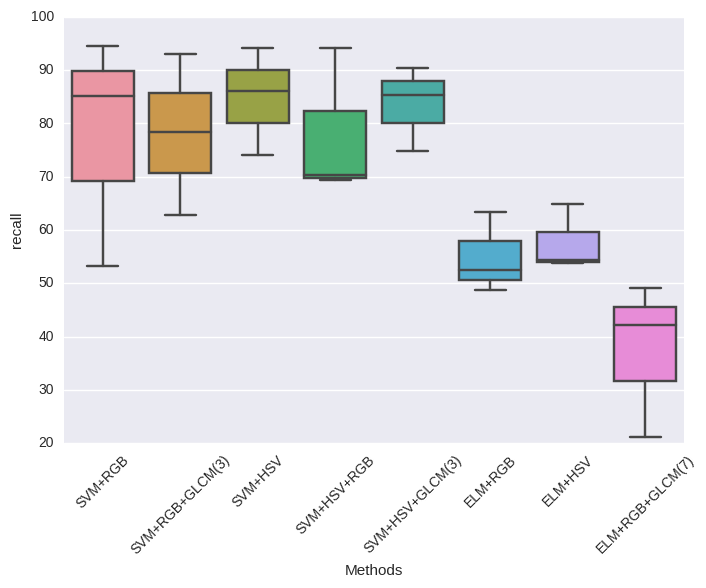

In [13]:
sns.boxplot(y = 'recall', x = 'Methods', data = accu_data)
plt.xticks(rotation = 45)

In [31]:
import matplotlib.markers as mrk

In [4]:
accu_data

,Accuracy,images,recall,f1,precision,Methods,images.1
0,97.20,Image1,94.5550,94.0925,93.6625,SVM+RGB,Image1
1,96.46,Image1,92.9450,92.5325,88.2375,SVM+RGB+GLCM(3),Image1
2,97.09,Image1,94.1275,93.9050,93.6925,SVM+HSV,Image1
3,96.40,Image1,94.1600,92.4475,90.9000,SVM+HSV+RGB,Image1
4,95.50,Image1,90.4700,90.8350,91.4275,SVM+HSV+GLCM(3),Image1
5,92.44,Image1,63.3200,62.5825,62.0225,ELM+RGB,Image1
6,95.05,Image1,64.9000,64.4225,63.9800,ELM+HSV,Image1
7,57.95,Image1,21.1000,21.3250,21.5500,ELM+RGB+GLCM(7),Image1
8,63.54,Image2,53.2250,56.7775,73.7875,SVM+RGB,Image2
9,56.01,Image2,62.8850,58.8775,69.1050,SVM+RGB+GLCM(3),Image2


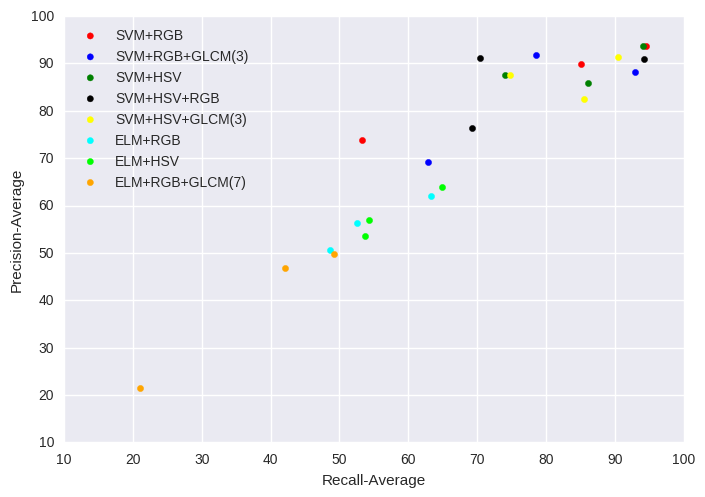

In [50]:
plt.scatter(accu_data[accu_data["Methods"]=="SVM+RGB"]["recall"],accu_data[accu_data["Methods"]=="SVM+RGB"]["precision"],color="red",label="SVM+RGB")
plt.scatter(accu_data[accu_data["Methods"]=="SVM+RGB+GLCM(3)"]["recall"],accu_data[accu_data["Methods"]=="SVM+RGB+GLCM(3)"]["precision"],color="blue",label ="SVM+RGB+GLCM(3)")
plt.scatter(accu_data[accu_data["Methods"]=="SVM+HSV"]["recall"],accu_data[accu_data["Methods"]=="SVM+HSV"]["precision"],color="green",label="SVM+HSV")
plt.scatter(accu_data[accu_data["Methods"]=="SVM+HSV+RGB"]["recall"],accu_data[accu_data["Methods"]=="SVM+HSV+RGB"]["precision"],color="black",label="SVM+HSV+RGB")
plt.scatter(accu_data[accu_data["Methods"]=="SVM+HSV+GLCM(3)"]["recall"],accu_data[accu_data["Methods"]=="SVM+HSV+GLCM(3)"]["precision"],color="yellow",label="SVM+HSV+GLCM(3)")
plt.scatter(accu_data[accu_data["Methods"]=="ELM+RGB"]["recall"],accu_data[accu_data["Methods"]=="ELM+RGB"]["precision"],color="cyan",label="ELM+RGB")
plt.scatter(accu_data[accu_data["Methods"]=="ELM+HSV"]["recall"],accu_data[accu_data["Methods"]=="ELM+HSV"]["precision"],color="lime",label="ELM+HSV")
plt.scatter(accu_data[accu_data["Methods"]=="ELM+RGB+GLCM(7)"]["recall"],accu_data[accu_data["Methods"]=="ELM+RGB+GLCM(7)"]["precision"],color="orange",label="ELM+RGB+GLCM(7)")

plt.legend(loc='upper left')
plt.xlabel("Recall-Average")
plt.ylabel("Precision-Average")

In [17]:
accu_data[accu_data["images"]=="Image1"]["recall"]

0    94.5550
1    92.9450
2    94.1275
3    94.1600
4    90.4700
5    63.3200
6    64.9000
7    21.1000
Name: recall, dtype: float64

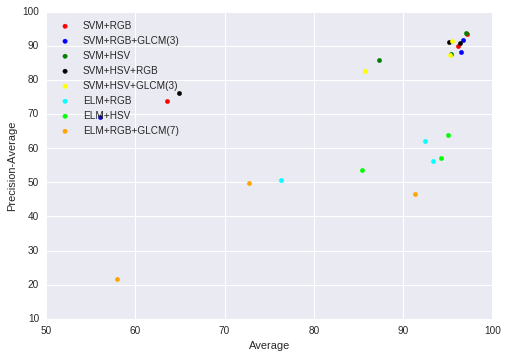

In [3]:
plt.scatter(accu_data[accu_data["Methods"]=="SVM+RGB"]["Accuracy"],accu_data[accu_data["Methods"]=="SVM+RGB"]["precision"],color="red",label="SVM+RGB")
plt.scatter(accu_data[accu_data["Methods"]=="SVM+RGB+GLCM(3)"]["Accuracy"],accu_data[accu_data["Methods"]=="SVM+RGB+GLCM(3)"]["precision"],color="blue",label ="SVM+RGB+GLCM(3)")
plt.scatter(accu_data[accu_data["Methods"]=="SVM+HSV"]["Accuracy"],accu_data[accu_data["Methods"]=="SVM+HSV"]["precision"],color="green",label="SVM+HSV")
plt.scatter(accu_data[accu_data["Methods"]=="SVM+HSV+RGB"]["Accuracy"],accu_data[accu_data["Methods"]=="SVM+HSV+RGB"]["precision"],color="black",label="SVM+HSV+RGB")
plt.scatter(accu_data[accu_data["Methods"]=="SVM+HSV+GLCM(3)"]["Accuracy"],accu_data[accu_data["Methods"]=="SVM+HSV+GLCM(3)"]["precision"],color="yellow",label="SVM+HSV+GLCM(3)")
plt.scatter(accu_data[accu_data["Methods"]=="ELM+RGB"]["Accuracy"],accu_data[accu_data["Methods"]=="ELM+RGB"]["precision"],color="cyan",label="ELM+RGB")
plt.scatter(accu_data[accu_data["Methods"]=="ELM+HSV"]["Accuracy"],accu_data[accu_data["Methods"]=="ELM+HSV"]["precision"],color="lime",label="ELM+HSV")
plt.scatter(accu_data[accu_data["Methods"]=="ELM+RGB+GLCM(7)"]["Accuracy"],accu_data[accu_data["Methods"]=="ELM+RGB+GLCM(7)"]["precision"],color="orange",label="ELM+RGB+GLCM(7)")

plt.legend(loc='upper left')
plt.xlabel("Average")
plt.ylabel("Precision-Average")

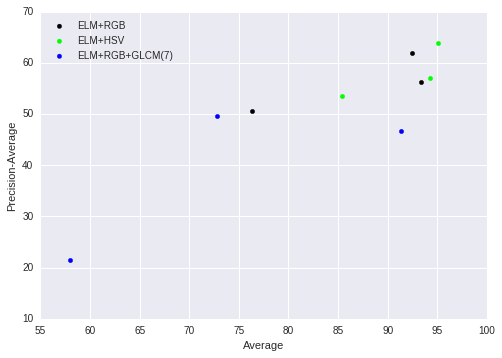

In [4]:

plt.scatter(accu_data[accu_data["Methods"]=="ELM+RGB"]["Accuracy"],accu_data[accu_data["Methods"]=="ELM+RGB"]["precision"],color="black",label="ELM+RGB")
plt.scatter(accu_data[accu_data["Methods"]=="ELM+HSV"]["Accuracy"],accu_data[accu_data["Methods"]=="ELM+HSV"]["precision"],color="lime",label="ELM+HSV")
plt.scatter(accu_data[accu_data["Methods"]=="ELM+RGB+GLCM(7)"]["Accuracy"],accu_data[accu_data["Methods"]=="ELM+RGB+GLCM(7)"]["precision"],color="blue",label="ELM+RGB+GLCM(7)")

plt.legend(loc='upper left')
plt.xlabel("Average")
plt.ylabel("Precision-Average")